## Кластерный анализ

In [ ]:
# вначале импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Этап 1. Загрузка данных

In [ ]:
# импортируем набор данных из модуля datasets библиотеки sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# создаем датафрейм, берем данные из iris.data и название столбцов из iris.feature_names
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# смотрим первые пять значений
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# посмотрим на размерность
iris_df.shape

(150, 4)

### Этап 2. Предаварительная обработка данных

In [ ]:
# проверим, есть ли пропущенные значения
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
iris_scaled = scaler.fit_transform(iris_df)

# заново создадим датафрейм с нормализованными значениями
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)

# посмотрим на первые пять строк
iris_df_scaled.round(2).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.90,1.02,-1.34,-1.32
1,-1.14,-0.13,-1.34,-1.32
2,-1.39,0.33,-1.40,-1.32
3,-1.51,0.10,-1.28,-1.32
4,-1.02,1.25,-1.34,-1.32


### Этап 3. EDA и отбор признаков

In [ ]:
# оставим все признаки и для наглядности поместим данные в переменную Х
# целевой переменной разумеется нет
X = iris_df_scaled
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Этап 4. Обучение и оценка качества модели

Выбор количества кластеров (настройка гиперпараметра)

Text(0, 0.5, 'WCSS')

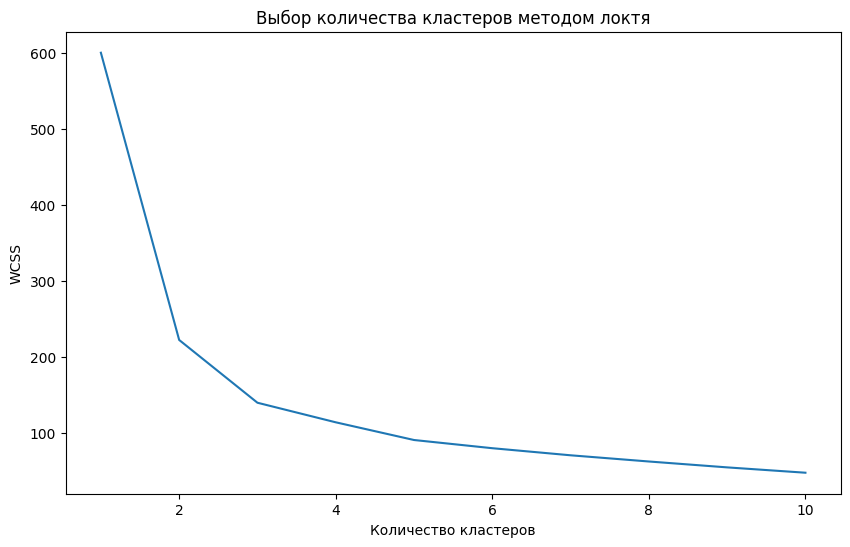

In [ ]:
# импортируем нужный класс
from sklearn.cluster import KMeans

# создадим пустой список для записи показателя WCSS (ошибки)
wcss = []

# воспользуемся новой для нас функцией range(), она возвращает последовательность чисел
# в данном случае числа от 1 до 10
for i in range(1, 11):

    # настроим параметры модели (подробнее об этом на сайте)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

    # обучим модель на данных с разным количеством кластеров
    kmeans.fit(X)

    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

# зададим размер график
plt.figure(figsize = (10,6))
# передадим функции plot() последовательность кластеров и ошибку WCSS
plt.plot(range(1, 11), wcss)
# и добавим подписи
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')

Обучение модели с тремя кластерами (k = 3)

In [ ]:
# заново обучим модель с тремя кластерами
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred = kmeans.fit_predict(X)

Оценка качества

In [ ]:
# посмотрим на WCSS
kmeans.inertia_

139.82049635974982

In [ ]:
# посмотрим на целевую переменную (такое возможно только в учебном датасете!)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# теперь на прогноз
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
# мы видим, что кодировка видов не совпадает

# пройдемся списком по всему массиву y_pred
for i in range(len(y_pred)):
  # если было 1, заменим на 0
  if y_pred[i] == 1:
    y_pred[i] = 0
  # если было 0, будет 1
  elif y_pred[i] == 0:
    y_pred[i] = 2
  # если было 2, будет 1
  elif y_pred[i] == 2:
    y_pred[i] = 1

In [ ]:
# посмотрим на измененную кодировку
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1
 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [ ]:
# поместим переменные в словарь
d = {'Target' : iris.target, 'Prediction' : y_pred}

# превратим словарь в датафрейм с соответствующими названиями столбцов
result = pd.DataFrame(d, columns = ['Target', 'Prediction'])
result.head(2)

,Target,Prediction
0,0,0
1,0,0


In [ ]:
# с помощью функции where зададим логическое значение
# если совпадает, True, если нет - False
comparison = np.where(result['Target'] == result['Prediction'], True, False)

# на выходе получим массив Numpy
print(type(comparison))
print(comparison[:5])

<class 'numpy.ndarray'>
[ True  True  True  True  True]


In [ ]:
# добавим этот массив в качестве столбца в датафрейм
result['Comparison'] = comparison
result.head()

,Target,Prediction,Comparison
0,0,0,True
1,0,0,True
2,0,0,True
3,0,0,True
4,0,0,True


In [ ]:
# выведем долю совпавших (True) и не совпавших (False) значений
result['Comparison'].value_counts(normalize = True).round(2)

Comparison
True     0.83
False    0.17
Name: proportion, dtype: float64

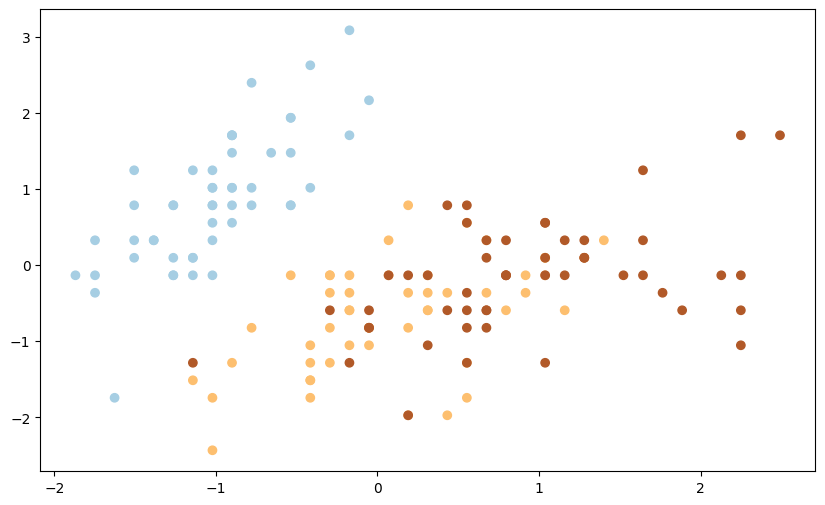

In [ ]:
# посмотрим на целевую переменную с помощью точечной диаграммы

# зададим размер
plt.figure(figsize = (10,6))

# возьмем первый и второй столбцы с помощью функции iloc()
# параметр с задаст каждой точке определенный код (0, 1, 2), а
# camp определит цвет каждой из точек
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = iris.target, cmap = 'Paired')

In [1]:
# теперь посмотим на результат алгоритма кластеризации
plt.figure(figsize = (10,6))

# снова построим точечную диаграмму, но коды точек возьмем из y_pred
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')

# кроме того выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 150, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')

# укажем, где разместить легенду
plt.legend(loc = 'upper right')

NameError: name 'plt' is not defined